<a href="https://colab.research.google.com/github/mrchapagain/SocialNetworkAnalytics/blob/main/TwiteerDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweeter Data Analytics

***Here I will cover:***
1.   *Basics of Analyzing Twitter Data*
2.   *Processing Twitter text*
1.   *Exploring Twitter Networks*
2.   *Putting Twitter data on the map*

***Twiteer APIs:***
*   *Search API*
*   *Ads API*
*   *Streaming API*

#1. Basics of Analyzing Twitter Data

***Libaries***

In [1]:
# Necessary libaries
from tweepy import OAuthHandler
from tweepy import API
import tweepy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

***Necessary information form tweet account***
*   access_token
*   access_token_secret
*   consumer_key
*   consumer_secret

***Tweepy authentication***

In [30]:

#brear_token= 'AAAAAAAAAAAAAAAAAAAAAOlDeQEAAAAAtxFqk6MPlQlb%2BXr9%2F%2FfigPqSrRM%3D5zoaTJT2GA3XhDBDAfgrnCnr1WxeCFVMVT5k3oUz97D4JJfZOD'

auth = OAuthHandler(consumer_key, consumer_secret) # Consumer key authentication
auth.set_access_token(access_token, access_token_secret) # Access key authentication
api = API(auth)  # Set up the API with the authentication handler
api.me().screen_name  # just check if it is working

'mrchapagain'

***Function for scraping and updating data***

In [3]:
# Function to extact data from twetter user
def extract_timeline_as_df(timeline_list):
  columns = set()
  allowed_types = [str, int]
  tweets_data= []

  for status in timeline_list:
    status_dict= dict(vars(status))
    keys= status_dict.keys()

    single_tweet_data = {'user': status.user.screen_name, 'author': status.author.screen_name}
    
    for k in keys:
      try:
        v_type= type(status_dict[k])
      except:
        v_type = None
      
      if v_type != None:
        if v_type in allowed_types:
          single_tweet_data[k] = status_dict[k]
          columns.add(k) # these are the variable that can extracted data from

    tweets_data.append(single_tweet_data)

  header_cols= list(columns)
  header_cols.append('user')
  header_cols.append('author')
  df= pd.DataFrame(tweets_data, columns= header_cols)
  return df

***Getting actul data with the function difined earlier***

In [4]:
my_timeline= api.home_timeline()
df2= extract_timeline_as_df(my_timeline)
df2.head()

,favorite_count,id_str,id,source,source_url,text,retweet_count,lang,user,author
0,0,1542995300704522244,1542995300704522244,EUwatch,https://www.euwatch.live,Weekly schedule of President Charles Michel ht...,0,en,EUwatchers,EUwatchers
1,4,1542995072215646213,1542995072215646213,SocialFlow,http://www.socialflow.com,Covid-19: NI self-isolation period reduced to ...,2,en,bbchealth,bbchealth
2,4,1542994986194685953,1542994986194685953,Adobe Express,https://adobe.com/express,Flexible funding is our most valuable resource...,1,en,Refugees,Refugees
3,0,1542992923121405953,1542992923121405953,EUwatch,https://www.euwatch.live,"RT @MediaFreedomEU: 🇺🇦 On 22 June, reporters f...",10,en,EUwatchers,EUwatchers
4,0,1542992921619845120,1542992921619845120,EUwatch,https://www.euwatch.live,"RT @AmplifyUkraine: In conclusion, we collecte...",2,en,EUwatchers,EUwatchers


In [13]:
user_timeline= api.get_user('code').timeline()
df3= extract_timeline_as_df(user_timeline)
df3.head()

,favorite_count,id_str,id,source,source_url,text,retweet_count,in_reply_to_user_id_str,lang,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_status_id,in_reply_to_screen_name,user,author
0,24,1542898837320339456,1542898837320339456,Buffer,https://buffer.com,📣Don't miss the latest #VSCode livestream! @al...,10,NaN,en,NaN,NaN,NaN,NaN,code,code
1,39,1542520851278442496,1542520851278442496,Buffer,https://buffer.com,#VSCode livestream starts in 10 minutes! We're...,10,NaN,en,NaN,NaN,NaN,NaN,code,code
2,0,1541834926936494081,1541834926936494081,TweetDeck,https://about.twitter.com/products/tweetdeck,RT @NickZhu9: Hi everyone! Welcome to our June...,36,NaN,en,NaN,NaN,NaN,NaN,code,code
3,39,1541834313750159362,1541834313750159362,Buffer,https://buffer.com,We're back this Thursday to talk about #Machin...,5,NaN,en,NaN,NaN,NaN,NaN,code,code
4,163,1539636083801071616,1539636083801071616,Buffer,https://buffer.com,"Hey #VSCode friends, we're off this week and w...",18,NaN,en,NaN,NaN,NaN,NaN,code,code


***Creating variable to navigate twetter***

In [14]:
# Obtaining tweet from specific user account
number_of_tweets = 200
tweets = []
likes = []
time = []

for i in tweepy.Cursor(api.user_timeline, id="DRNyheder", tweet_mode="extended").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)

***Loading them in Data Frame***

In [15]:
# save them as dataframe by passing variables as a columns
df = pd.DataFrame({"tweets":tweets, "likes":likes, "time":time})
df= df[~df.tweets.str.contains("RT")].reset_index(drop=True)
#now lets make only tweets thats has not Re-Tweeted!

df.head()

,tweets,likes,time
0,Pandemi-tømmermænd gjorde første halvår på akt...,4,2022-07-01 20:26:06
1,ANALYSE Nu venter alle på De Radikale https://...,2,2022-07-01 18:56:06
2,Seneste nyt fra Ukraine: Brite og marokkaner a...,4,2022-07-01 17:54:04
3,Radikalt bagland presser partitop: Advokater s...,51,2022-07-01 16:34:06
4,Kristian Thulesen Dahl om opsigtsvækkende jobs...,7,2022-07-01 13:52:08


In [16]:
# Top most liked tweets
mostlike= df.loc[df.likes.nlargest(10).index].set_index("tweets")
mostlike

,likes,time
tweets,,
Støttepartier tøver med at lade uvildige advokater vurdere minkrapport: 'Kan bedst betegnes som hykleri' https://t.co/Ry9EjxqRvm https://t.co/JAB32AD4Zn,89,2022-06-29 09:06:04
Radikalt bagland presser partitop: Advokater skal vurdere om Mette Frederiksen skal for rigsret https://t.co/EUBhvTgKE1 https://t.co/2NjjCvg8YA,51,2022-07-01 16:34:06
Seneste nyt fra Ukraine: Zelenskyj vil have Rusland ud af FN's Sikkerhedsråd https://t.co/rgKyeBaJIk https://t.co/mjdnFSXxji,51,2022-06-29 12:53:33
"ANALYSE: Rystende vidneudsagn kæder Trump sammen med bevæbnede tilhængere, som han dirigerede mod Kongressen https://t.co/x2EmTn4Sk4 https://t.co/8HwZxTxly0",46,2022-06-29 04:04:09
Skotsk folkeafstemning om uafhængighed er 'tabersag på alle måder' for den britiske regering https://t.co/aDCNhyLgPc https://t.co/hUTvNzSLYL,43,2022-06-28 19:16:08
Inger Støjberg starter nyt parti. Det får navnet ’Danmarksdemokraterne’ https://t.co/NblMHLUCL1 https://t.co/qlKDvm6XLg,41,2022-06-23 06:30:07
Nyt parti med Støjbergs navn godkendt https://t.co/W8AJODDQxU https://t.co/xUaxr8cOKl,39,2022-06-21 16:07:03
"Inger Støjberg: 'Det her parti det skal være sådan et parti for folk, som vi er flest' https://t.co/aQYftCrGfH https://t.co/ynbV52pJhB",37,2022-06-23 12:40:09
Eksperter: Milliardregning fra metro og ringvej til Lynetteholm kan ende hos skatteborgerne https://t.co/8b0sBYl1vb https://t.co/6cPRzJz4Zx,36,2022-06-27 18:54:08


***Sentiment Analytics***

In [17]:
# Libaries for sentiment analytics (NLP)
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

In [18]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

In [34]:
# Split all the sentances and creat the list of sentence of from the tweet columns
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)
print(lines[:20])

['Pandemi-tømmermænd', 'gjorde', 'første', 'halvår', 'på', 'aktiemarkedet', 'blodrødt:', 'Det', 'skal', 'nok', 'blive', 'værre,', 'før', 'det', 'bliver', 'bedre', 'https://t.co/qQSCvJzQMK', 'https://t.co/nW2dmzdUse', 'ANALYSE', 'Nu']


In [20]:
# Removing Punctuation by using Regular Expression (RegEx)
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2= []

for word in lines:
  if word != '':
    lines2.append(word)

In [21]:
# Stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem= []
for word in lines2:
  stem.append(s_stemmer.stem(word))

In [22]:
# Removing all the stop words
stem2= []

for word in stem:
  if word not in nlp.Defaults.stop_words:
    stem2.append(word)

In [23]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()
df2.head()

er     48
p      44
og     42
det    39
til    34
Name: 0, dtype: int64

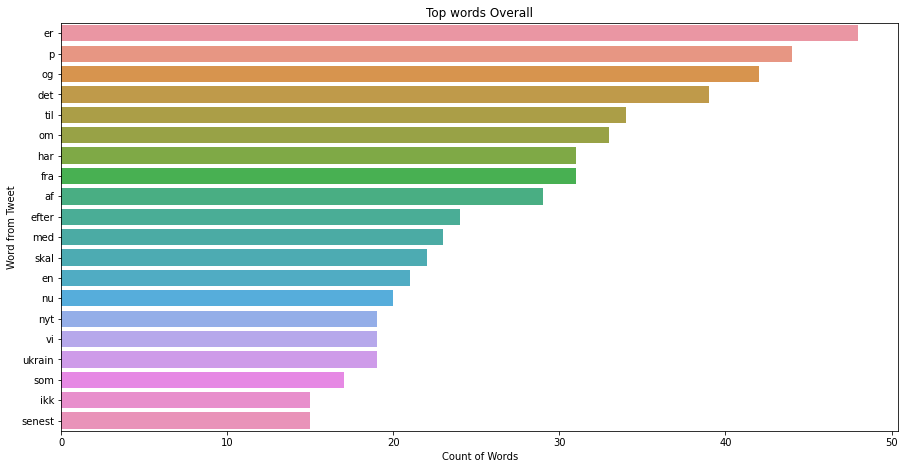

In [24]:
# Visualization
df2= df2[:20,]
plt.figure(figsize=(15,7.5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top words Overall')
plt.ylabel('Word from Tweet')
plt.xlabel('Count of Words')
plt.show()

In [25]:
# Visualization for mentions organizations
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [26]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

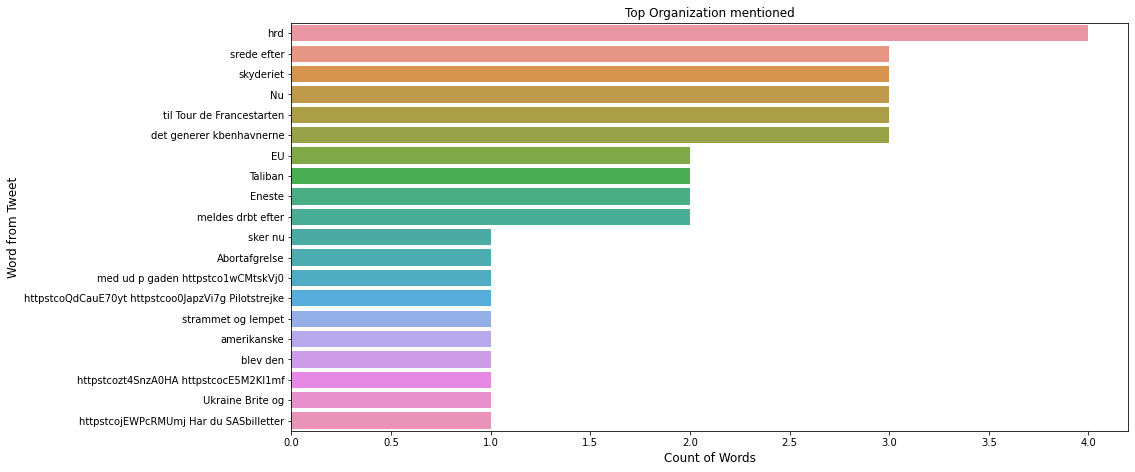

In [27]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organization mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [28]:
str1 = " "
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

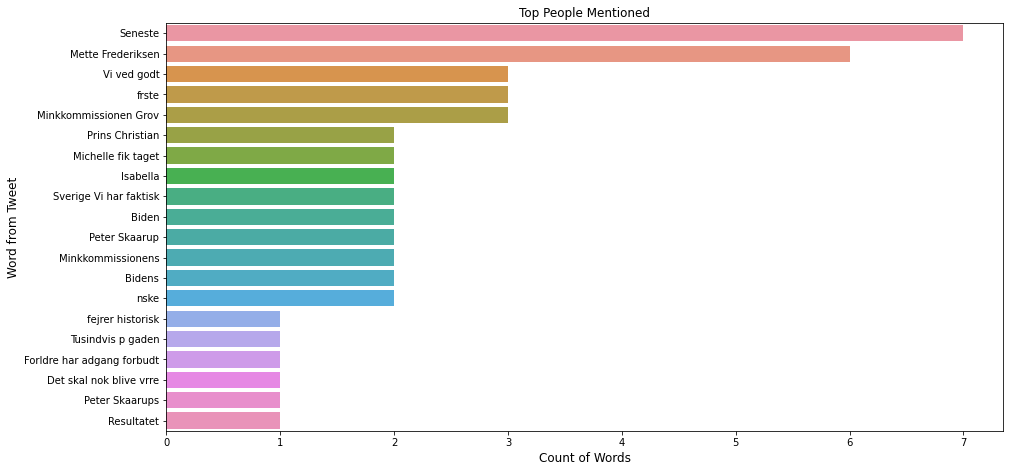

In [29]:
# Visualization again
dfx= df7[:20, ]
plt.figure(figsize=(15,7.5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()